In [90]:
import numpy as np                                     # Matlab like syntax for linear algebra and functions
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys             
from sympy import *                                # Module to see files and folders in directories
from scipy import stats
from scipy.stats import binom
from scipy.special import binom as binomcoef
from scipy.special import expit
import pandas as pd
import os
from importlib import reload

from pprint import pprint
import urllib.request
from html_table_parser.parser import HTMLTableParser

plt.style.use("./KD_style.mplstyle")

In [91]:

# binary contents (HTTP Response Body)
def url_get_contents(url):
 
    # Opens a website and read its
    # binary contents (HTTP Response Body)
 
    #making request to the website
    req = urllib.request.Request(url=url, headers={'User-Agent': 'Mozilla/5.0'})
    f = urllib.request.urlopen(req)
 
    #reading contents of the website
    return f.read()
 
# defining the html contents of a URL.
xhtml = url_get_contents('https://kenpom.com/index.php?y=2014').decode('utf-8')
# pprint(xhtml)
# Defining the HTMLTableParser object
p = HTMLTableParser()
 
# feeding the html contents in the
# HTMLTableParser object
p.feed(xhtml)
# print(np.array(p.tables[0]))
# first_
# Now finally obtaining the data of
# the table required
# pd.to_csv
 
# converting the parsed data to
# dataframe
data1 = p.tables[0][1:]

dataframe1 = pd.DataFrame(data1)
databoolean = [dataframe1[0][i][:].isdigit() for i in dataframe1.index]
keepbool = [True, True, True, True, True, True, False, True, False, True, False, True, False, True, False, True, False, True, False, True, False]
cleandata = np.array([row for idx, row in enumerate(data1) if databoolean[idx] == True])
# print(cleandata[:,keepbool].shape)
names = data1[0]
names[-1] = "NCSOS AdjEM"
names[-4] = "Strength AdjEM"
print(names)
data_2014 = pd.DataFrame(cleandata[:,keepbool], columns= names)


# Saved 09/02/2023
data_2014.to_csv("College_Basketball_Ratings_2014.csv", index=False)

['Rk', 'Team', 'Conf', 'W - L', 'AdjEM', 'AdjO', 'AdjD', 'AdjT', 'Luck', 'Strength AdjEM', 'OppO', 'OppD', 'NCSOS AdjEM']


In [92]:
data_2014 = pd.read_csv("./College_Basketball_Ratings_2014.csv")
display(data_2014)

,Rk,Team,Conf,W - L,AdjEM,AdjO,AdjD,AdjT,Luck,Strength AdjEM,OppO,OppD,NCSOS AdjEM
0,1,Louisville 4,Amer,31-6,30.41,118.9,88.5,67.2,-0.045,4.31,107.0,102.7,-4.65
1,2,Arizona 1,P12,33-5,30.11,116.5,86.4,62.8,0.014,9.30,109.9,100.6,1.62
2,3,Florida 1,SEC,36-3,28.57,116.5,88.0,61.3,0.053,9.02,109.4,100.4,2.39
3,4,Virginia 1,ACC,30-7,26.46,114.8,88.3,59.5,0.012,8.67,109.4,100.8,1.57
4,5,Wisconsin 2,B10,30-8,25.89,122.0,96.1,62.4,0.019,11.44,110.2,98.8,3.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,347,Mississippi Valley St.,SWAC,9-23,-22.93,93.0,115.9,70.9,0.012,-8.65,98.8,107.4,6.21
347,348,Abilene Christian,Slnd,11-20,-23.35,94.0,117.3,63.2,-0.045,-2.67,104.7,107.4,13.38
348,349,Presbyterian,BSth,6-26,-25.87,94.2,120.0,63.5,-0.017,-7.84,101.7,109.6,-7.05
349,350,Grambling St.,SWAC,5-24,-26.60,95.5,122.1,66.0,-0.017,-9.05,98.7,107.8,6.51


[85, 115]


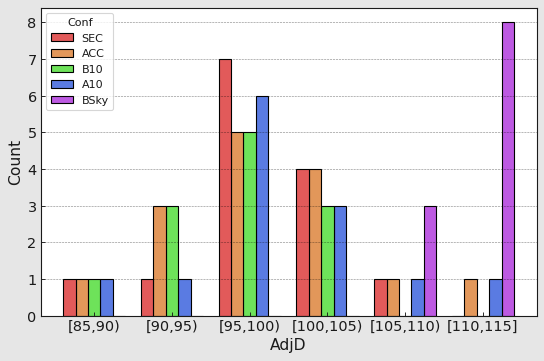

In [121]:
conf_interest = ["ACC", "SEC", "B10", "BSky", "A10"]
conf_mask_2014 = [conf in conf_interest for conf in data_2014["Conf"]]
data_2014_confselect = data_2014.iloc[conf_mask_2014]
# sns.set_palette(sns.color_palette(plt.get_cmap))
fig, ax = plt.subplots()
# print(plt.prop_cycle())
binwidth = 5
datarange = [np.min(data_2014_confselect["AdjD"].to_numpy(dtype=np.float64)), np.max(data_2014_confselect["AdjD"].to_numpy(dtype=np.float64))]
binrange = [int(datarange[0] - datarange[0]%binwidth), int(datarange[1] + (binwidth - datarange[1]%binwidth))]
print(binrange)
sns.histplot(x = "AdjD", data = data_2014_confselect, hue = "Conf", binwidth=binwidth, binrange=binrange, multiple = "dodge", ax = ax,  shrink = 0.8)
ticks_pos = [edge + binwidth/2 for edge in range(*binrange, binwidth)]
ticks_name = [f"[{edge:.0f},{edge+binwidth:.0f})" for edge in range(*binrange, binwidth)]
ticks_name[-1] = ticks_name[-1].replace(")", "]")
ax.set_xticks(ticks_pos)
ax.set_xticklabels(ticks_name)
# ax.xaxis.set_tick_params(width = 55, color = "k", size = 1.5)
# ax.xaxis.set_ticks_position("bottum")
ax.axis
ax.grid(False, axis = "x")
# ax.legend()